# 2:
Create ndarray from befkbhalderstatkode.csv

function: 

    getArrayFromCSV(file)


Parameters: 

    file: Filename of the csv file.

In [2]:
import solutions as sls
from pprint import pprint

filename = "befkbhalderstatkode.csv"

dataset = sls.getArrayFromCSV(file=filename)
pprint(dataset)

array([[2015,    1,    0, 5100,  614],
       [2015,    1,    0, 5104,    2],
       [2015,    1,    0, 5106,    1],
       ...,
       [1992,   99,   89, 5100,    1],
       [1992,   99,   90, 5180,    1],
       [1992,   99,   93, 5100,    1]], dtype=uint32)


# 3:
Get amount of native and non-native English speakers 

function: 

    getEnglishSpeakers(file)


Parameters: 

    file: Filename of the csv file.

In [3]:
sls.getEnglishSpeakers(file=filename)

(9039, 580295)

# 4:
Get filtered dataset based on given mask

function: 

    getFilteredDataset(originDataset, mask)


Parameters: 

    originDataset: Original dataset, made in 2 dimensional array
    mask: A custom sorting mask. E.g.: dataset[:,3] == 5120

In [4]:
swedes = dataset[:,3] == 5120
year = dataset[:,0] == 1999
sls.getFilteredDataset(originDataset = dataset, mask = year)


array([[1999,    1,    0, 5100,  543],
       [1999,    1,    0, 5103,    1],
       [1999,    1,    0, 5104,    1],
       ...,
       [1999,   99,   86, 5100,    1],
       [1999,   99,   94, 5100,    1],
       [1999,   99,  100, 5100,    1]], dtype=uint32)

# 5:
Get population based on category and value

function: 

    getSpecificData(originDataset, data, value)


Parameters: 

    originDataset: Original dataset, made in 2 dimensional array
    data: Category; 0: year, 1: area, 2: age, 3: nationality
    value: Which value to use in search e.g. which year or age.
    
#### Extra note:
    This was made slightly different from the assignment due to personal preferences. The assignment asked for 2 arguments / parameters I chose 3.

In [27]:
# Year: data = 0, value = 2015
# Area: data = 1, value = 5
# Age: data = 2, value = 20
# Nationality = 3, value = 5170
sls.getSpecificData(originDataset = dataset, data = 2, value = 20)

167372

# 6:
Graph showcasing population change in Copenhagen from 1992 through 2015


In [31]:
# Made due to module not being loaded properly

def getSpecificData(originDataset, data, value):
    switcher = {
         0: (originDataset[:,0] == value), # Year
         1: (originDataset[:,1] == value), # Area
         2: (originDataset[:,2] == value), # Age
         3: (originDataset[:,3] == value), # Nationality
    }
    return np.sum(originDataset[switcher.get(data)][:,4])

<IPython.core.display.Javascript object>


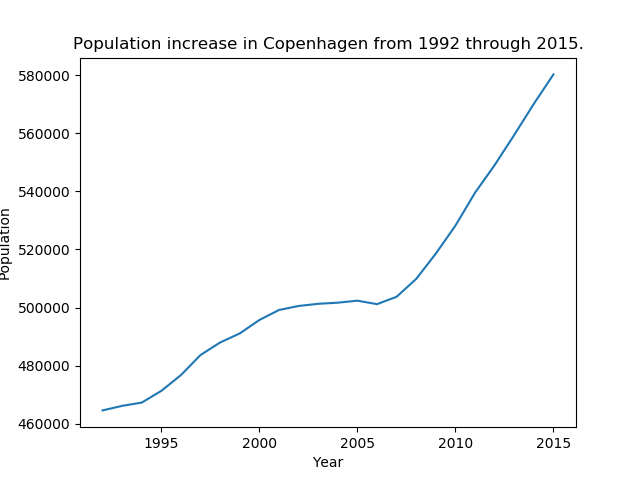

In [129]:
%matplotlib notebook
import matplotlib.pyplot as plt

population = np.array([[x for x in range(1992, 2016)], [getSpecificData(originDataset = dataset, data = 0, value = x) for x in range(1992, 2016)]])

title = 'Population increase in Copenhagen from {} through {}.'.format(years[0], years[-1])
plt.title(title, fontsize = 12)
plt.xlabel("Year", fontsize = 10)
plt.ylabel("Population", fontsize = 10)
plt.plot(population[0,:], population[1,:])

# 7:
Graph showcasing German population change throughout the years.

<IPython.core.display.Javascript object>


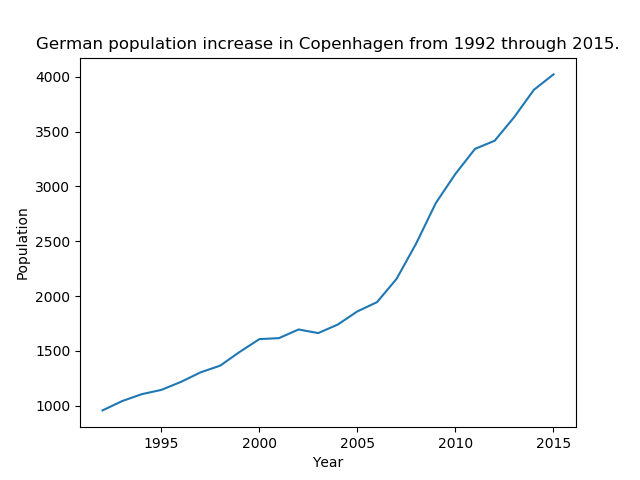

In [131]:
%matplotlib notebook
import matplotlib.pyplot as plt

german_mask = dataset[:,3] == 5180
german_dataset = sls.getFilteredDataset(originDataset = dataset, mask = german_mask)
german_population = np.array([[x for x in range(1992, 2016)], [getSpecificData(originDataset = german_dataset, data = 0, value = x) for x in range(1992, 2016)]])


title = 'German population increase in Copenhagen from {} through {}.'.format(years[0], years[-1])
plt.title(title, fontsize = 12)
plt.xlabel("Year", fontsize = 10)
plt.ylabel("Population", fontsize = 10)
plt.plot(german_population[0,:], german_population[1,:])

# 8:
Graph showcasing 18-25 year and 60-67 year olds in Copenhagen areas


<IPython.core.display.Javascript object>


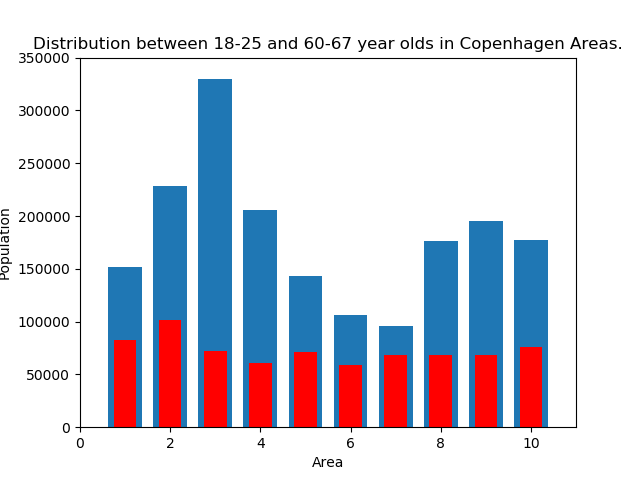

In [160]:
areas = np.unique(dataset[:,1])

young_mask = (dataset[:,2] >= 18) & (dataset[:,2] <= 25)
young_dataset = sls.getFilteredDataset(originDataset = dataset, mask = young_mask)
young_population = np.array([areas, [getSpecificData(originDataset = young_dataset, data = 1, value = x) for x in areas]])

old_mask = (dataset[:,2] >= 60) & (dataset[:,2] <= 67)
old_dataset = sls.getFilteredDataset(originDataset = dataset, mask = old_mask)
old_population = np.array([areas, [getSpecificData(originDataset = old_dataset, data = 1, value = x) for x in areas]])


#18-25
plt.bar(young_population[0,:], young_population[1,:], width=.75, align='center') # bar(x-vals, y-vals, bar width, align bar relative to x-val on x-axis) )
#60-67
plt.bar(old_population[0,:], old_population[1,:], width=0.5, align='center', color='red')


plt.axis([0, 11, 0, 350000]) #axis(x-min, x-max, y-min, y-max)
title = 'Distribution between {} and {} year olds in Copenhagen Areas.'.format("18-25", "60-67")
plt.title(title, fontsize=12)
plt.xlabel("Area", fontsize=10)
plt.ylabel("Population", fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=10)

# 8:
Graph showcasing ages groups in Østerbro & Vesterbro


<IPython.core.display.Javascript object>


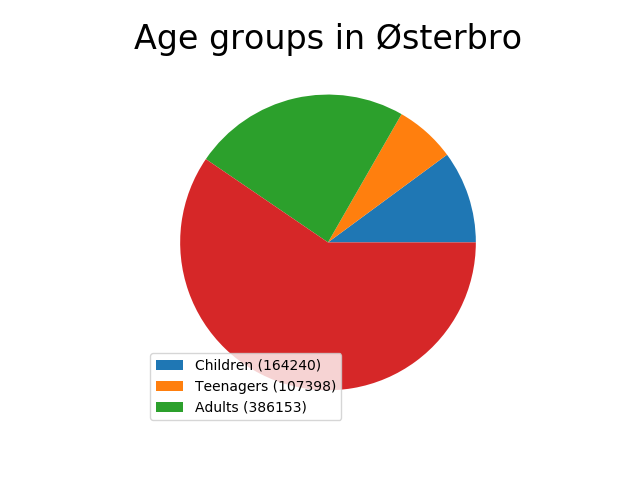

<IPython.core.display.Javascript object>


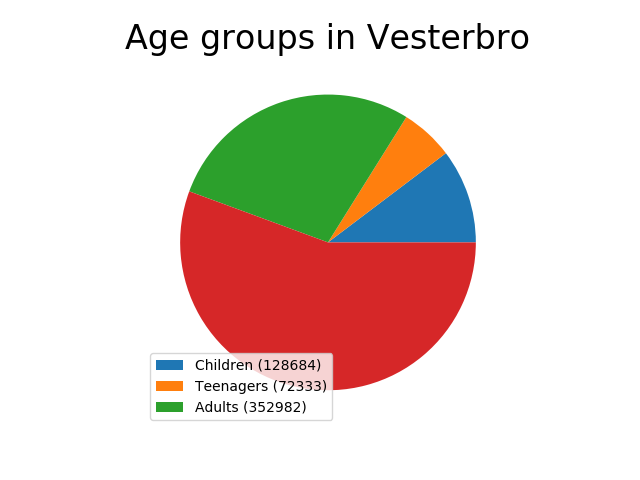

In [196]:
# Østerbro graph & data extracted using filter and specified data functions
children_mask = (dataset[:,2] >= 0) & (dataset[:,2] < 10)
teenagers_mask = (dataset[:,2] >= 10) & (dataset[:,2] < 20)
adults_mask = (dataset[:,2] >= 20) & (dataset[:,2] < 30)
other_mask = (dataset[:,2] >= 30)

children_dataset = sls.getFilteredDataset(originDataset = dataset, mask = children_mask)
teenagers_dataset = sls.getFilteredDataset(originDataset = dataset, mask = teenagers_mask)
adults_dataset = sls.getFilteredDataset(originDataset = dataset, mask = adults_mask)
other_dataset = sls.getFilteredDataset(originDataset = dataset, mask = other_mask)

children_population = getSpecificData(originDataset = children_dataset, data = 1, value = 2)
teenagers_population = getSpecificData(originDataset = teenagers_dataset, data = 1, value = 2)
adults_population = getSpecificData(originDataset = adults_dataset, data = 1, value = 2)
other_population = getSpecificData(originDataset = other_dataset, data = 1, value = 2)

children = 'Children (' + str(children_population) + ')'
teenagers = 'Teenagers (' + str(teenagers_population) + ')'
adults = 'Adults (' + str(adults_population) + ')'
other = 'Other (' + str(other_population) + ')'

plt.figure()
plt.pie([children_population, teenagers_population, adults_population, other_population])
plt.title("Age groups in Østerbro", fontsize=24)
labels = [children,teenagers, adults]
plt.legend(labels, loc="best")

#Vesterbro graph & data extracted using the filter function only


vesterbro_children_mask = (dataset[:,2] >= 0) & (dataset[:,2] < 10) & (dataset[:,1] == 4)
vesterbro_teenagers_mask = (dataset[:,2] >= 10) & (dataset[:,2] < 20) & (dataset[:,1] == 4)
vesterbro_adults_mask = (dataset[:,2] >= 20) & (dataset[:,2] < 30) & (dataset[:,1] == 4)
vesterbro_other_mask = (dataset[:,2] >= 30) & (dataset[:,1] == 4)

vesterbro_children_population = sls.getFilteredDataset(originDataset = dataset, mask = vesterbro_children_mask)[:,4].sum()
vesterbro_teenagers_population = sls.getFilteredDataset(originDataset = dataset, mask = vesterbro_teenagers_mask)[:,4].sum()
vesterbro_adults_population = sls.getFilteredDataset(originDataset = dataset, mask = vesterbro_adults_mask)[:,4].sum()
vesterbro_other_population = sls.getFilteredDataset(originDataset = dataset, mask = vesterbro_other_mask)[:,4].sum()


vesterbro_children = 'Children (' + str(vesterbro_children_population) + ')'
vesterbro_teenagers = 'Teenagers (' + str(vesterbro_teenagers_population) + ')'
vesterbro_adults = 'Adults (' + str(vesterbro_adults_population) + ')'
vesterbro_other = 'Other (' + str(vesterbro_other_population) + ')'

plt.figure()
plt.pie([vesterbro_children_population, vesterbro_teenagers_population, vesterbro_adults_population, vesterbro_other_population])
plt.title("Age groups in Vesterbro", fontsize=24)
labels = [vesterbro_children, vesterbro_teenagers, vesterbro_adults]
plt.legend(labels, loc="best")